# Julia practice

In [3]:
array = [ 1 2 3 ]

1×3 Array{Int64,2}:
 1  2  3

# Function

In [4]:
# function to calculate the volume of a sphere
function sphere_vol(r)
  # julia allows Unicode names (in UTF-8 encoding)
  # so either "pi" or the symbol π can be used
  return 4/3*pi*r^3
end

# functions can also be defined more succinctly
quadratic(a, sqr_term, b) = (-b + sqr_term) / 2a

# calculates x for 0 = a*x^2+b*x+c, arguments types can be defined in function definitions
function quadratic2(a::Float64, b::Float64, c::Float64)
  # unlike other languages 2a is equivalent to 2*a
  # a^2 is used instead of a**2 or pow(a,2)
  sqr_term = sqrt(b^2-4a*c)
  r1 = quadratic(a, sqr_term, b)
  r2 = quadratic(a, -sqr_term, b)
  # multiple values can be returned from a function using tuples
  # if the return keyword is omitted, the last term is returned
  r1, r2
end

vol = sphere_vol(3)
#  allows number formatting but does not automatically append the \n to statements, see below
 "volume = %0.3f\n" vol 
#> volume = 113.097

quad1, quad2 = quadratic2(2.0, -2.0, -12.0)
println("result 1: ", quad1)
#> result 1: 3.0
println("result 2: ", quad2)
#> result 2: -2.

volume = 113.097
result 1: 3.0
result 2: -2.0


# Strings

In [5]:
# strings are defined with double quotes
# like variables, strings can contain any unicode character
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"
println(s1)
#> The quick brown fox jumps over the lazy dog α,β,γ

# println adds a new line to the end of output
# print can be used if you dont want that:
print("this")
#> this
print(" and")
#> and
print(" that.\n")
#> that.

# chars are defined with single quotes
c1 = 'a'
println(c1)
#> a
# the ascii value of a char can be found with Int():
println(c1, " ascii value = ", Int(c1))
#> a ascii value = 97
println("Int('α') == ", Int('α'))
#> Int('α') == 945

# so be aware that
println(Int('1') == 1)
#> false

# strings can be converted to upper case or lower case:
s1_caps = uppercase(s1)
s1_lower = lowercase(s1)
println(s1_caps, "\n", s1_lower)
#> THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α,Β,Γ
#> the quick brown fox jumps over the lazy dog α,β,γ

# sub strings can be indexed like arrays:
# (show prints the raw value)
show(s1[11]); println()
#> 'b'

# or sub strings can be created:
show(s1[1:10]); println()
#> "The quick "

# end is used for the end of the array or string
show(s1[end-10:end]); println()
#> "dog α,β,γ"

# julia allows string Interpolation:
a = "wolcome"
b = "julia"
println("$a to $b.")
#> wolcome to julia.

# this can extend to evaluate statements:
println("1 + 2 = $(1 + 2)")
#> 1 + 2 = 3

# strings can also be concatenated using the * operator
# using * instead of + isn't intuitive when you start with Julia,
# however people think it makes more sense
s2 = "this" * " and" * " that"
println(s2)
#> this and that

# as well as the string function
s3 = string("this", " and", " that")
println(s3)
#> this and that

The quick brown fox jumps over the lazy dog α,β,γ
this and that.
a
a ascii value = 97
Int('α') == 945
false
THE QUICK BROWN FOX JUMPS OVER THE LAZY DOG Α,Β,Γ
the quick brown fox jumps over the lazy dog α,β,γ
'b'
"The quick "
"dog α,β,γ"
wolcome to julia.
1 + 2 = 3
this and that
this and that


In [6]:
# strings can be converted using float and int:
e_str1 = "2.718"
e = float(e_str1)
println(5e)
#> 13.5914
num_15 = parse(Int, "15")
println(3num_15)
#> 45

# numbers can be converted to strings and formatted using printf
 "e = %0.2f\n" e
#> 2.718
# or to create another string sprintf
e_str2 = @sprintf("%0.3f", e)

# to show that the 2 strings are the same
println("e_str1 == e_str2: $(e_str1 == e_str2)")
#> e_str1 == e_str2: true

# available number format characters are f, e, g, c, s, p, d:
# (pi is a predefined constant; however, since its type is 
# "MathConst" it has to be converted to a float to be formatted)
 "fix trailing precision: %0.3f\n" float(pi)
#> fix trailing precision: 3.142
 "scientific form: %0.6e\n" 1000pi
#> scientific form: 3.141593e+03
# g is not implemented yet
 "a character: %c\n" 'α'
#> a character: α
 "a string: %s\n" "look I'm a string!"
#> a string: look I'm a string!
 "right justify a string: %50s\n" "width 50, text right justified!"
#> right justify a string:                    width 50, text right justified!
 "a pointer: %p\n" 100000000
#> a pointer: 0x0000000005f5e100
 "print a integer: %d\n" 1e10
#> print an integer: 10000000000 

13.59
45
e = 2.72
e_str1 == e_str2: true
fix trailing precision: 3.142
scientific form: 3.141593e+03
a character: α
a string: look I'm a string!
right justify a string:                    width 50, text right justified!
a pointer: 0x0000000005f5e100
print a integer: 10000000000


In [7]:
s1 = "The quick brown fox jumps over the lazy dog α,β,γ"

# search returns the first index of a char
i = search(s1, 'b')
println(i)
#> 11
# the second argument is equivalent to the second argument of split, see below

# or a range if called with another string
r = search(s1, "brown")
println(r)
#> 11:15


# string replace is done thus:
r = replace(s1, "brown", "red")
show(r); println()
#> "The quick red fox jumps over the lazy dog"

# search and replace can also take a regular expressions by preceding the string with 'r'
r = search(s1, r"b[\w]*n")
println(r)
#> 11:15

# again with a regular expression
r = replace(s1, r"b[\w]*n", "red")
show(r); println()
#> "The quick red fox jumps over the lazy dog"

# there are also functions for regular expressions that return RegexMatch types
# match scans left to right for the first match (specified starting index optional)
r = match(r"b[\w]*n", s1)
println(r)
#> RegexMatch("brown")

# RegexMatch types have a property match that holds the matched string
show(r.match); println()
#> "brown"

# matchall returns a vector with RegexMatches for each match
r = matchall(r"[\w]{4,}", s1)
println(r)
#> SubString{UTF8String}["quick","brown","jumps","over","lazy"]

# eachmatch returns an iterator over all the matches
r = eachmatch(r"[\w]{4,}", s1)
for i in r print("\"$(i.match)\" ") end
println()
#> "quick" "brown" "jumps" "over" "lazy" 

# a string can be repeated using the repeat function, 
# or more succinctly with the ^ syntax:
r = "hello "^3
show(r); println() #> "hello hello hello "

# the strip function works the same as python:
# e.g., with one argument it strips the outer whitespace
r = strip("hello ")
show(r); println() #> "hello"
# or with a second argument of an array of chars it strips any of them;
r = strip("hello ", ['h', ' '])
show(r); println() #> "ello"
# (note the array is of chars and not strings)

# similarly split works in basically the same way as python:
r = split("hello, there,bob", ',')
show(r); println() #> ["hello"," there","bob"]
r = split("hello, there,bob", ", ")
show(r); println() #> ["hello","there,bob"]
r = split("hello, there,bob", [',', ' '], limit=0, keep=false)
show(r); println() #> ["hello","there","bob"]
# (the last two arguements are limit and include_empty, see docs)

# the opposite of split: join is simply
r = join(collect(1:10), ", ")
println(r) #> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10


11
11:15
"The quick red fox jumps over the lazy dog α,β,γ"
11:15
"The quick red fox jumps over the lazy dog α,β,γ"
RegexMatch("brown")
"brown"
SubString{String}["quick", "brown", "jumps", "over", "lazy"]
"quick" "brown" "jumps" "over" "lazy" 
"hello hello hello "
"hello"
"ello"
SubString{String}["hello", " there", "bob"]
SubString{String}["hello", "there,bob"]
SubString{String}["hello", "there", "bob"]
1, 2, 3, 4, 5, 6, 7, 8, 9, 10


# Arrays

In [8]:
function printsum(a)
    # summary generates a summary of an object
    println(summary(a), ": ", repr(a))
end

# arrays can be initialised directly:
a1 = [1,2,3]
printsum(a1)
#> 3-element Array{Int64,1}: [1,2,3]

# or initialised empty:
a2 = []
printsum(a2)
#> 0-element Array{None,1}: None[]

# since this array has no type, functions like push! (see below) don't work
# instead arrays can be initialised with a type:
a3 = Int64[]
printsum(a3)
#> 0-element Array{Int64,1}: []

# ranges are different from arrays:
a4 = 1:20
printsum(a4)
#> 20-element UnitRange{Int64}: 1:20

# however they can be used to create arrays thus:
a4 = collect(1:20)
printsum(a4)
#> 20-element Array{Int64,1}: [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

# arrays can also be generated from comprehensions:
a5 = [2^i for i = 1:10]
printsum(a5)
#> 10-element Array{Int64,1}: [2,4,8,16,32,64,128,256,512,1024]

# arrays can be any type, so arrays of arrays can be created:
a6 = (Array{Int64, 1})[]
printsum(a6)
#> 0-element Array{Array{Int64,1},1}: []
# (note this is a "jagged array" (i.e., an array of arrays), not a multidimensional array,
# these are not covered here)

# Julia provided a number of "Dequeue" functions, the most common for appending to the end of arrays
# is push!
# ! at the end of a function name indicates that the first argument is updated.

push!(a1, 4)
printsum(a1)
#> 4-element Array{Int64,1}: [1,2,3,4]

# push!(a2, 1) would cause error:

push!(a3, 1)
printsum(a3) #> 1-element Array{Int64,1}: [1]
#> 1-element Array{Int64,1}: [1]

push!(a6, [1,2,3])
printsum(a6)
#> 1-element Array{Array{Int64,1},1}: [[1,2,3]]

# using repeat() to create arrays
# you must use the keywords "inner" and "outer"
# all arguments must be arrays (not ranges)
a7 = repeat(a1,inner=[2],outer=[1])
printsum(a7)
#> 8-element Array{Int64,1}: [1,1,2,2,3,3,4,4]
a8 = repeat(collect(4:-1:1),inner=[1],outer=[2])
printsum(a8)
#> 8-element Array{Int64,1}: [4,3,2,1,4,3,2,1]

3-element Array{Int64,1}: [1, 2, 3]
0-element Array{Any,1}: Any[]
0-element Array{Int64,1}: Int64[]
20-element UnitRange{Int64}: 1:20
20-element Array{Int64,1}: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
10-element Array{Int64,1}: [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
0-element Array{Array{Int64,1},1}: Array{Int64,1}[]
4-element Array{Int64,1}: [1, 2, 3, 4]
1-element Array{Int64,1}: [1]
1-element Array{Array{Int64,1},1}: Array{Int64,1}[[1, 2, 3]]
8-element Array{Int64,1}: [1, 1, 2, 2, 3, 3, 4, 4]
8-element Array{Int64,1}: [4, 3, 2, 1, 4, 3, 2, 1]


In [9]:
# repeat can be useful to expand a grid
# as in R's expand.grid() function:
m1 = hcat(repeat([1,2],inner=[1],outer=[3*2]),
          repeat([1,2,3],inner=[2],outer=[2]),
          repeat([1,2,3,4],inner=[3],outer=[1]))
printsum(m1)
#> 12×3 Array{Int64,2}: [1 1 1; 2 1 1; 1 2 1; 2 2 2; 1 3 2; 2 3 2; 1 1 3; 2 1 3; 1 2 3; 2 2 4; 1 3 4; 2 3 4]

# for simple repetitions of arrays,
# use repmat
m2 = repmat(m1,1,2)     # replicate a9 once into dim1 and twice into dim2
println("size: ", size(m2))
#> size: (12,6)

m3 = repmat(m1,2,1)     # replicate a9 twice into dim1 and once into dim2
println("size: ", size(m3))
#> size: (24,3)

# Julia comprehensions are another way to easily create
# multidimensional arrays

m4 = [i+j+k for i=1:2, j=1:3, k=1:2] # creates a 2x3x2 array of Int64
m5 = ["Hi Im # $(i+2*(j-1 + 3*(k-1)))" for i=1:2, j=1:3, k=1:2]
# expressions are very flexible
# you can specify the type of the array by just
# placing it in front of the expression
Pkg.add("LegacyStrings")
import LegacyStrings
m5 = LegacyStrings.ASCIIString["Hi Im element # $(i+2*(j-1 + 3*(k-1)))" for i=1:2, j=1:3, k=1:2]
printsum(m5)
#> 2x3x2 Array{LegacyStrings.ASCIIString,3}: LegacyStrings.ASCIIString["Hi Im element # 7"
#> "Hi Im element # 9" "Hi Im element # 11"
#>             "Hi Im element # 8" "Hi Im element # 10" "Hi Im element # 12"]
#>
#> LegacyStrings.ASCIIString["Hi Im element # 7" "Hi Im element # 9" "Hi Im element # 11"
#>             "Hi Im element # 8" "Hi Im element # 10" "Hi Im element # 12"]

# Array reductions
# many functions in Julia have an array method
# to be applied to specific dimensions of an array:

sum(m4,3)        # takes the sum over the third dimension
sum(m4,(1,3)) # sum over first and third dim

maximum(m4,2)    # find the max elt along dim 2
findmax(m4,3)    # find the max elt and its index along dim 3 (available only in very recent Julia versions)

# Broadcasting
# when you combine arrays of different sizes in an operation,
# an attempt is made to "spread" or "broadcast" the smaller array
# so that the sizes match up. broadcast operators are preceded by a dot:

m4 .+ 3       # add 3 to all elements
m4 .+ [1,2]      # adds vector [1,2] to all elements along first dim

# slices and views
m4=m4[:,:,1] # holds dim 3 fixed
m4[:,2,:]  # that's a 2x1x2 array. not very intuititive to look at

# get rid of dimensions with size 1:
squeeze(m4[:,2,:],2)  # that's better

# assign new values to a certain view
m4[:,:,1] = rand(1:6,2,3)
printsum(m4)
#> 2x3x2 Array{Int64,3}: [3 5 2
#>  2 2 2]
#>
#> [4 5 6
#>  5 6 7]

# (for more examples of try, catch see Error Handling above)
try
    # this will cause an error, you have to assign the correct type
    m4[:,:,1] = rand(2,3)
catch err
    println(err)
end
#> InexactError()

try
    # this will cause an error, you have to assign the right shape
    m4[:,:,1] = rand(1:6,3,2)
catch err
    println(err)
end
#> DimensionMismatch("tried to assign 3x2 array to 2x3x1 destination")

12×3 Array{Int64,2}: [1 1 1; 2 1 1; 1 2 1; 2 2 2; 1 3 2; 2 3 2; 1 1 3; 2 1 3; 1 2 3; 2 2 4; 1 3 4; 2 3 4]
size: (12, 6)
size: (24, 3)


INFO: Cloning cache of LegacyStrings from https://github.com/JuliaArchive/LegacyStrings.jl.git
INFO: Installing LegacyStrings v0.3.0
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of LegacyStrings
INFO: Use `Pkg.update()` to get the latest versions of your packages
INFO: Precompiling module LegacyStrings.


2×3×2 Array{LegacyStrings.ASCIIString,3}: LegacyStrings.ASCIIString["Hi Im element # 1" "Hi Im element # 3" "Hi Im element # 5"; "Hi Im element # 2" "Hi Im element # 4" "Hi Im element # 6"]

LegacyStrings.ASCIIString["Hi Im element # 7" "Hi Im element # 9" "Hi Im element # 11"; "Hi Im element # 8" "Hi Im element # 10" "Hi Im element # 12"]
2×3 Array{Int64,2}: [2 2 6; 6 3 6]
InexactError()
DimensionMismatch("tried to assign 3×2 array to 2×3×1 destination")


In [15]:
?help repl

LoadError: [91mMethodError: no method matching repl(::Symbol, ::Symbol)[0m
Closest candidates are:
  repl([91m::IO[39m, ::Symbol) at docs/utils.jl:185
  repl([91m::IO[39m, ::Any) at docs/utils.jl:196
  repl(::Any) at docs/utils.jl:198[39m

In [34]:
for i in enumerate(Int32[1 2 3])
    println("hello")
end

hello
hello
hello


In [25]:
√(3+4) + √5

4.8818192885643805

# Dictionaries

In [10]:
# dicts can be initialised directly:
a1 = Dict(1=>"one", 2=>"two")
printsum(a1) #> Dict{Int64,String}: {2=>"two",1=>"one"}

# then added to:
a1[3]="three"
printsum(a1) #> Dict{Int64,String}: {2=>"two",3=>"three",1=>"one"}
# (note dicts cannot be assumed to keep their original order)

# dicts may also be created with the type explicitly set
a2 = Dict{Int64, AbstractString}()
a2[0]="zero"
printsum(a2)
#> Dict{Int64,AbstractString} with 1 entry: Dict{Int64,AbstractString}(Pair{Int64,AbstractString}(0,"zero"))

# dicts, like arrays, may also be created from comprehensions
a3 = Dict([i => @sprintf("%d", i) for i = 1:10])
printsum(a3)
#> Dict{Any,Any}: {5=>"5",4=>"4",6=>"6",7=>"7",2=>"2",10=>"10",9=>"9",8=>"8",3=>"3",1=>"1"}

# as you would expect, Julia comes with all the normal helper functions
# for dicts, e.g., haskey
println(haskey(a1,1)) #> true

# which is equivalent to
println(1 in keys(a1)) #> true
# where keys creates an iterator over the keys of the dictionary

# similar to keys, values get iterators over the dict's values:
printsum(values(a1)) 
#> Base.ValueIterator for a Dict{Int64,String} with 3 entries: String["two","three","one"]

# use collect to get an array:
printsum(collect(values(a1)))
#> 3-element Array{String,1}: String["two","three","one"]

Dict{Int64,String} with 2 entries: Dict(2=>"two",1=>"one")
Dict{Int64,String} with 3 entries: Dict(2=>"two",3=>"three",1=>"one")
Dict{Int64,AbstractString} with 1 entry: Dict{Int64,AbstractString}(Pair{Int64,AbstractString}(0, "zero"))
Dict{Int64,String} with 10 entries: Dict(7=>"7",4=>"4",9=>"9",10=>"10",2=>"2",3=>"3",5=>"5",8=>"8",6=>"6",1=>"1")
true
true
Base.ValueIterator for a Dict{Int64,String} with 3 entries: String["two", "three", "one"]
3-element Array{String,1}: String["two", "three", "one"]


# Plotting

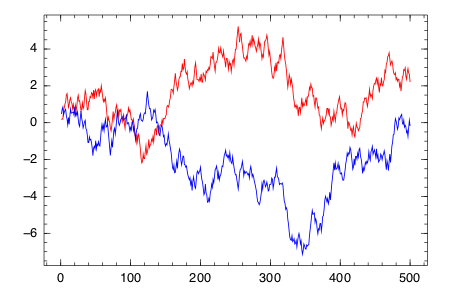

In [2]:
# Pkg.add("Winston")
# had to brew install cairo pango
using Winston

# plot some data
pl = plot(cumsum(rand(500) .- 0.5), "r", cumsum(rand(500) .- 0.5), "b")
# display the plot (not done automatically!)
display(pl)

# save the current figure
savefig("winston.svg")
# .eps, .pdf, & .png are also supported
# we used svg here because it respects the width and height specified above

In [43]:
Pkg.add("Winston")

INFO: Installing Cairo v0.5.1
INFO: Installing ColorTypes v0.6.7
INFO: Installing Colors v0.8.2
INFO: Installing FixedPointNumbers v0.4.6
INFO: Installing Graphics v0.3.0
INFO: Installing Homebrew v0.6.3
INFO: Installing IniFile v0.4.0
INFO: Installing NaNMath v0.3.1
INFO: Installing Reexport v0.1.0
INFO: Installing Tk v0.5.2
INFO: Installing Winston v0.13.2
INFO: Building Homebrew


Already up-to-date.
Uninstalling fontconfig... (493 files, 3.2MB)
==> Installing fontconfig from staticfloat/juliatranslated
==> Downloading https://homebrew.bintray.com/bottles/fontconfig-2.12.6.sierra.bottle.tar.gz
Already downloaded: /Users/ldavis/Library/Caches/Homebrew.jl/fontconfig-2.12.6.sierra.bottle.tar.gz
==> Pouring fontconfig-2.12.6.sierra.bottle.tar.gz
==> Regenerating font cache, this may take a while
==> /Users/ldavis/.julia/v0.6/Homebrew/deps/usr/Cellar/fontconfig/2.12.6/bin/fc-cache -frv
🍺  /Users/ldavis/.julia/v0.6/Homebrew/deps/usr/Cellar/fontconfig/2.12.6: 493 files, 3.2MB


INFO: Building Cairo
INFO: Building Tk
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of Winston
INFO: Use `Pkg.update()` to get the latest versions of your packages
